# Homework 03


## Part 1 - Questions

### Question 1: 

What kind of vaccine is used most widely?

* Who (population): people who have got vaccine
* What (subject, discipline): vaccination
* Where (location): around the world
* When (snapshot, longitudinal): up to Feb. 20, 2021
* How much data do you need to do the analysis/work: Daily and Total Vaccination for COVID-19 in the World (~1MB)

### Question 2: 

In which day does the daily number of people who got vaccinated reach the top?

* Who (population): people who have got vaccine
* What (subject, discipline): vaccination
* Where (location): around the world
* When (snapshot, longitudinal): up to Feb. 20, 2021
* How much data do you need to do the analysis/work: Daily and Total Vaccination for COVID-19 in the World (~1MB)

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

The government (e.g. ministry of health) should have collected relevant data and published them

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: COVID-19 World Vaccination Progress
2. Link to Data: https://www.kaggle.com/gpreda/covid-world-vaccination-progress
3. Source / Origin: 
	* Author or Creator: Gabriel Preda
	* Publication Date: Daily update since the beginning of 2021
	* Publisher: Kaggle
	* Version or Data Accessed: Version 43
4. License: CC0: Public Domain
5. Can You Use this Data Set for Your Intended Use Case? yes

## Format




### Overview

* Format: csv
* Size: 725 KB
* Number of Records: 3619



### Sample of Data




In [37]:
# Assume that jupyter-lab was started in src folder

with open('../data/raw/country_vaccinations.csv', 'r') as f: 
    lines = f.readlines()
print("header: " + lines[0])
print("line 1: " + lines[1])
print("line 2: " + lines[2])

header: country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website

line 1: Albania,ALB,2021/1/10,0,0,,,,0,0,,,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e-shendetesise-736-te-vaksinuar-3935-testime-991-te-sheruar-1112-raste-te-reja-dhe-17-humbje-jete-ne-24-oret-e-fundit/

line 2: Albania,ALB,2021/1/11,,,,,64,,,,22,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e-shendetesise-736-te-vaksinuar-3935-testime-991-te-sheruar-1112-raste-te-reja-dhe-17-humbje-jete-ne-24-oret-e-fundit/




### Fields or Column Headers

* Field/Column 1:  country/str
* Field/Column 2:  iso_code/str
* Field/Column 3:  date/str
* Field/Column 4:  total_vaccinations/float
* Field/Column 5:  people_vaccinated/float
* Field/Column 6:  people_fully_vaccinated/float
* Field/Column 7:  daily_vaccinations_raw/float
* Field/Column 8:  daily_vaccinations/float
* Field/Column 9:  total_vaccinations_per_hundred/float
* Field/Column 10: people_vaccinated_per_hundred/float
* Field/Column 11: people_fully_vaccinated_per_hundred/float
* Field/Column 12: daily_vaccinations_per_million/float
* Field/Column 13: vaccines/str
* Field/Column 14: source_name/str
* Field/Column 15: source_website/str

## Part 3 - Extract / Transform

Describe your process for extracting, transforming, cleaning your incoming data:

* What columns you'll be using (extracting) from your dataset
    * country, daily_vaccinations, daily_vaccinations_per_million, vaccines
* How you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
    * I will directly convert `country` to str, `daily_vaccinations` to float, `daily_vaccinations_per_million` to float, `vaccines` to str
* Any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform
    * I will fill in missing values using special indicator for column `daily_vaccinations` and `daily_vaccinations_per_million`
* What you'll use a generator for
    * I will use generator in Step 2 to iterate over the rows of the original data and then only keep the columns I need

In [38]:
# Step 1: read data
with open("../data/raw/country_vaccinations.csv") as f:
    lines = f.readlines()
    
content = [x.strip().split(',') for x in lines]
header = content[0]
data = content[1:]

print(header)
print(data[0])

['country', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million', 'vaccines', 'source_name', 'source_website']
['Albania', 'ALB', '2021/1/10', '0', '0', '', '', '', '0', '0', '', '', 'Pfizer/BioNTech', 'Ministry of Health', 'https://shendetesia.gov.al/covid19-ministria-e-shendetesise-736-te-vaksinuar-3935-testime-991-te-sheruar-1112-raste-te-reja-dhe-17-humbje-jete-ne-24-oret-e-fundit/']


In [40]:
# Step 2: "extract" 3 columns
# "daily_vaccinations" in col 7
# "daily_vaccinations_per_million" in col 11
# "vaccines" in vol 12

def get_generator():
    i = 0
    while i < len(data):
        yield data[i]
        i = i + 1

g = get_generator()

extracted_data = []

for line in g:
    extracted_data.append([line[7], line[11], line[12]])

print(extracted_data)

[['', '', 'Pfizer/BioNTech'], ['64', '22', 'Pfizer/BioNTech'], ['64', '22', 'Pfizer/BioNTech'], ['63', '22', 'Pfizer/BioNTech'], ['66', '23', 'Pfizer/BioNTech'], ['62', '22', 'Pfizer/BioNTech'], ['62', '22', 'Pfizer/BioNTech'], ['58', '20', 'Pfizer/BioNTech'], ['55', '19', 'Pfizer/BioNTech'], ['51', '18', 'Pfizer/BioNTech'], ['47', '16', 'Pfizer/BioNTech'], ['40', '14', 'Pfizer/BioNTech'], ['34', '12', 'Pfizer/BioNTech'], ['26', '9', 'Pfizer/BioNTech'], ['21', '7', 'Pfizer/BioNTech'], ['15', '5', 'Pfizer/BioNTech'], ['9', '3', 'Pfizer/BioNTech'], ['4', '1', 'Pfizer/BioNTech'], ['', '', 'Pfizer/BioNTech'], ['', '', 'Pfizer/BioNTech'], ['', '', 'Pfizer/BioNTech'], ['', '', 'Pfizer/BioNTech'], ['', '', 'Pfizer/BioNTech'], ['', '', 'Pfizer/BioNTech'], ['12', '4', 'Pfizer/BioNTech'], ['24', '8', 'Pfizer/BioNTech'], ['35', '12', 'Pfizer/BioNTech'], ['47', '16', 'Pfizer/BioNTech'], ['59', '21', 'Pfizer/BioNTech'], ['71', '25', 'Pfizer/BioNTech'], ['82', '28', 'Pfizer/BioNTech'], ['81', '28', 

In [41]:
# Step 3: transform  "daily_vaccinations", "daily_vaccinations_per_million" to float
# None is used to fill in missing values, meaning "daily_vaccinations" or "daily_vaccinations_per_million" is unknown

for line in extracted_data:
    line[0] = float(line[0]) if line[0] != "" else None
    line[1] = float(line[1]) if line[1] != "" else None

print(extracted_data)

[[None, None, 'Pfizer/BioNTech'], [64.0, 22.0, 'Pfizer/BioNTech'], [64.0, 22.0, 'Pfizer/BioNTech'], [63.0, 22.0, 'Pfizer/BioNTech'], [66.0, 23.0, 'Pfizer/BioNTech'], [62.0, 22.0, 'Pfizer/BioNTech'], [62.0, 22.0, 'Pfizer/BioNTech'], [58.0, 20.0, 'Pfizer/BioNTech'], [55.0, 19.0, 'Pfizer/BioNTech'], [51.0, 18.0, 'Pfizer/BioNTech'], [47.0, 16.0, 'Pfizer/BioNTech'], [40.0, 14.0, 'Pfizer/BioNTech'], [34.0, 12.0, 'Pfizer/BioNTech'], [26.0, 9.0, 'Pfizer/BioNTech'], [21.0, 7.0, 'Pfizer/BioNTech'], [15.0, 5.0, 'Pfizer/BioNTech'], [9.0, 3.0, 'Pfizer/BioNTech'], [4.0, 1.0, 'Pfizer/BioNTech'], [None, None, 'Pfizer/BioNTech'], [None, None, 'Pfizer/BioNTech'], [None, None, 'Pfizer/BioNTech'], [None, None, 'Pfizer/BioNTech'], [None, None, 'Pfizer/BioNTech'], [None, None, 'Pfizer/BioNTech'], [12.0, 4.0, 'Pfizer/BioNTech'], [24.0, 8.0, 'Pfizer/BioNTech'], [35.0, 12.0, 'Pfizer/BioNTech'], [47.0, 16.0, 'Pfizer/BioNTech'], [59.0, 21.0, 'Pfizer/BioNTech'], [71.0, 25.0, 'Pfizer/BioNTech'], [82.0, 28.0, 'Pfiz

In [42]:
# Step 4: The data have already been transformed into 2-dimensional list 
# Step 5: Missing values have been handled in Step 3
# Step 6: The usage of generator is shown in Step 2

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data



In [43]:
import numpy as np

# In extracted_data, col 0 is "daily_vaccinations" and col 1 is "daily_vaccinations_per_million"

daily_vaccinations = [line[0] for line in extracted_data if line[0] != None]
daily_vaccinations_per_million = [line[1] for line in extracted_data if line[1] != None]

#### Central Tendency

In [44]:
daily_vaccinations_mean = np.mean(daily_vaccinations)
daily_vaccinations_median = np.median(daily_vaccinations)

daily_vaccinations_per_million_mean = np.mean(daily_vaccinations_per_million)
daily_vaccinations_per_million_median = np.median(daily_vaccinations_per_million)

print("mean of daily_vaccinations: {}".format(daily_vaccinations_mean))
print("median of daily_vaccinations: {}".format(daily_vaccinations_median))

print("mean of daily_vaccinations_per_million: {}".format(daily_vaccinations_per_million_mean))
print("median of daily_vaccinations_per_million: {}".format(daily_vaccinations_per_million_median))

mean of daily_vaccinations: 57547.96468561585
median of daily_vaccinations: 6081.0
mean of daily_vaccinations_per_million: 2279.3158196956647
median of daily_vaccinations_per_million: 1039.0


#### Dispersion

In [45]:
daily_vaccinations_var = np.var(daily_vaccinations)
daily_vaccinations_std = np.std(daily_vaccinations)

daily_vaccinations_per_million_var = np.var(daily_vaccinations_per_million)
daily_vaccinations_per_million_std = np.std(daily_vaccinations_per_million)

print("variance of daily_vaccinations: {}".format(daily_vaccinations_var))
print("standard deviation of daily_vaccinations: {}".format(daily_vaccinations_std))

print("variance of daily_vaccinations_per_million: {}".format(daily_vaccinations_per_million_var))
print("standard deviation of daily_vaccinations_per_million: {}".format(daily_vaccinations_per_million_std))

variance of daily_vaccinations: 31849542089.65451
standard deviation of daily_vaccinations: 178464.40006246205
variance of daily_vaccinations_per_million: 14348100.349296106
standard deviation of daily_vaccinations_per_million: 3787.8886400336673


#### Outliers


In [46]:
daily_vaccinations_min = np.min(daily_vaccinations)
daily_vaccinations_max = np.max(daily_vaccinations)

daily_vaccinations_per_million_min = np.min(daily_vaccinations_per_million)
daily_vaccinations_per_million_max = np.max(daily_vaccinations_per_million)

print("The range of daily_vaccinations is from {} to {}".format(daily_vaccinations_min, daily_vaccinations_max))
print("The range of daily_vaccinations_per_million is from {} to {}".format(daily_vaccinations_per_million_min, daily_vaccinations_per_million_max))

The range of daily_vaccinations is from 1.0 to 1916190.0
The range of daily_vaccinations_per_million is from 0.0 to 30869.0


###  Analysis on Categorical Data

In [52]:
# In extracted_data, col 2 is "vaccine", where space might exist

vaccines = np.array([line[2].split()[0] for line in extracted_data if line[2] != ""])
print(vaccines)

['Pfizer/BioNTech' 'Pfizer/BioNTech' 'Pfizer/BioNTech' ...
 'Oxford/AstraZeneca' 'Oxford/AstraZeneca' 'Oxford/AstraZeneca']


#### Frequency

In [55]:
def calculate_freq(categorical_list):
    freq_dict = {}
    for vaccine in categorical_list:
        if freq_dict.get(vaccine) != None:
            freq_dict[vaccine] = freq_dict[vaccine] + 1
        else:
            freq_dict[vaccine] = 1
    return freq_dict

print("The frequency of vaccines being used: \n {}".format(calculate_freq(vaccines)))

The frequency of vaccines being used: 
 {'Pfizer/BioNTech': 975, 'Sputnik': 159, 'Oxford/AstraZeneca': 921, 'Moderna': 1347, 'Sinopharm/Beijing': 96, 'Covaxin': 37, 'Sinovac': 79, 'Johnson&Johnson': 5}


#### Unique Values

In [56]:
def calculate_unique(categorical_list):
    return set(categorical_list)

print("Vaccines types: \n {}".format(calculate_unique(vaccines)))

Vaccines types: 
 {'Moderna', 'Covaxin', 'Sinovac', 'Pfizer/BioNTech', 'Oxford/AstraZeneca', 'Sinopharm/Beijing', 'Sputnik', 'Johnson&Johnson'}


## Part 5 - Visualizations



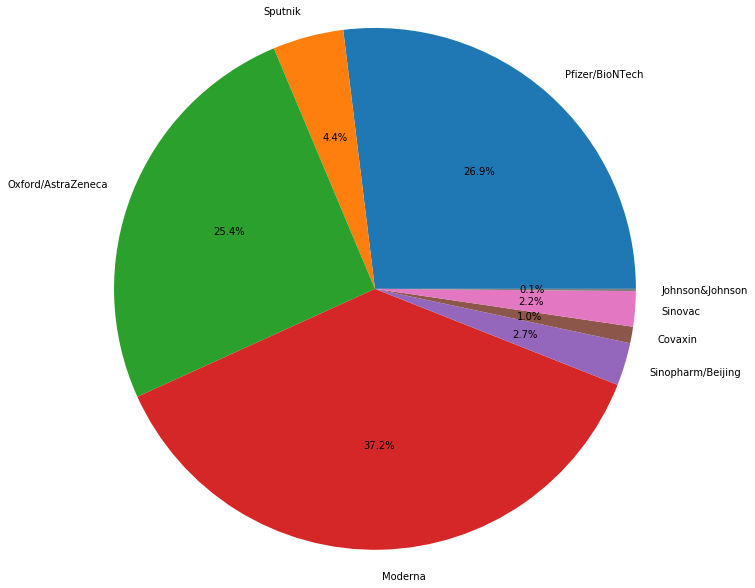

In [72]:
import matplotlib.pyplot as plt

# what kind of vaccine is used most widely?

vaccine_country_dict = calculate_freq(vaccines)

vaccine = list(vaccine_country_dict.keys())
count = list(vaccine_country_dict.values())

plt.pie(count, labels = vaccine, radius=3, autopct='%1.1f%%')
plt.show()

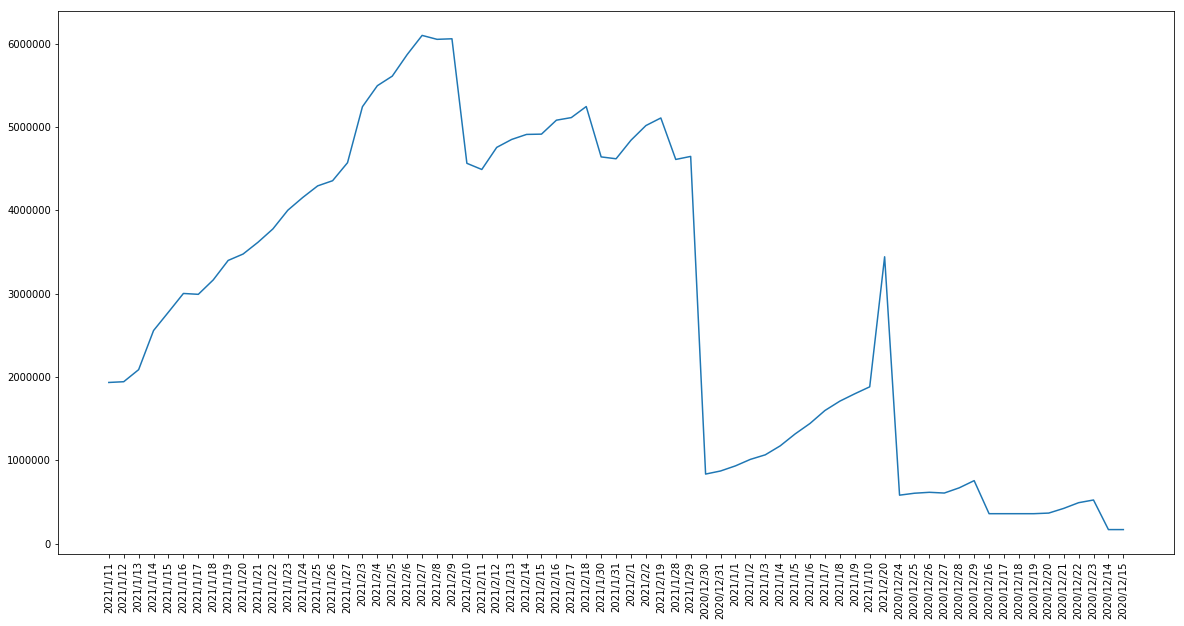

In [75]:
# In which day does the daily number of people who got vaccinated reach the top?

# In "data", col 2 is "date" and col 7 is "daily_vaccinations"

date_count_dict = {}

for line in data:
    if line[7] != "":
        if date_count_dict.get(line[2]) != None:
            date_count_dict[line[2]] = date_count_dict[line[2]] + float(line[7])
        else:
            date_count_dict[line[2]] = float(line[7])

dates = list(date_count_dict.keys())
count2 = list(date_count_dict.values())

plt.figure(figsize=(20,10))
plt.plot(dates, count2)
plt.xticks(rotation=90)
plt.show()

## Part 6 - Conclusion

### what kind of vaccine is used most widely? Moderna

### In which day does the daily number of people who got vaccinated reach the top? 2021/2/7
